In [1]:
!pip install tensorflow keras opencv-python

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# 1. Load the pre-trained Xception model for deepfake detection
model = Xception(weights='imagenet', include_top=True)


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# 2. Load and preprocess the input image (replace 'image_path' with your image path)
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img_resized = cv2.resize(img, (299, 299))  # Resize to 299x299 (input size for Xception)
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return preprocess_input(img_array)


In [5]:
# 3. Make predictions using the model
def predict_deepfake(image_path):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    return prediction


In [6]:
# 4. Example image path
image_path = "deepfake_image.jpg"  # Path to the image to be tested (deepfake or real)

In [7]:

# 5. Get the prediction
prediction = predict_deepfake(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [8]:
# 6. Display the result
print(f"Prediction: {prediction}")

Prediction: [[4.08934902e-05 5.05676071e-05 1.16969559e-05 1.30561803e-05
  7.16975192e-05 2.29767611e-05 3.51587514e-05 4.93488442e-05
  5.22988339e-05 1.84584118e-04 5.95775782e-05 2.98906234e-05
  3.10798205e-05 4.44388534e-05 2.39435540e-05 1.35830254e-04
  5.06946963e-05 5.29703502e-05 1.15661031e-04 6.86417479e-05
  9.50812100e-05 1.29027103e-04 1.13722992e-04 3.74247975e-05
  7.12287729e-05 3.47984205e-05 1.08242377e-04 1.00030433e-04
  5.56162013e-05 1.33477479e-05 4.24161844e-05 2.26029006e-05
  2.05161341e-05 6.32168667e-05 1.05315383e-04 6.28191410e-05
  4.35745496e-05 1.17805488e-04 5.30013749e-05 4.15371142e-05
  7.19900127e-05 4.10948305e-05 5.54715371e-05 3.20894651e-05
  3.87978689e-05 8.61974986e-05 5.06480610e-05 3.49021466e-05
  3.97074400e-05 2.52325808e-05 2.73922433e-05 3.87822547e-05
  2.11228209e-04 3.24478242e-05 9.56237272e-05 5.22343325e-05
  4.37886265e-05 2.75219627e-05 3.73473922e-05 2.38799330e-05
  2.65547133e-05 5.71518394e-05 1.40873062e-05 1.87713013e

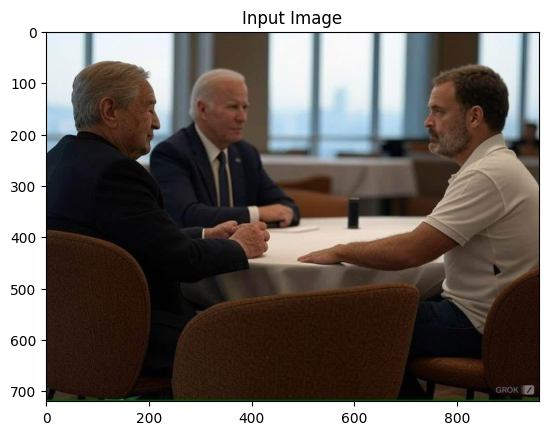

In [9]:
# 7. Visualize the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Input Image")
plt.show()